# Importing packages

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from scipy.special import softmax
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition, datasets
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


# Getting the data

In [205]:
df = pd.read_csv(r"E:\Machine Learning Project\archive (10)\train.csv")

In [211]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [213]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


In [214]:
df_copy = df.copy()

In [215]:
df_copy.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [216]:
df_copy.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [217]:
df_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [218]:
bins = [15, 24, 38, 50, 65, 90]
age_bins = pd.cut(df['Age'], bins)
df_copy['Age_bins'] = age_bins


In [219]:
df_copy.dtypes

ID                    int64
Gender               object
Ever_Married         object
Age                   int64
Graduated            object
Profession           object
Work_Experience     float64
Spending_Score       object
Family_Size         float64
Var_1                object
Segmentation         object
Age_bins           category
dtype: object

# Data Preprocessing

In [220]:
def fill_missing(col):
    segments = ['A', 'B', 'C', 'D'] 
    if df_copy[col].dtype == 'O':
        mode = df_copy.groupby('Segmentation')[col].agg(pd.Series.mode)
        if col == 'Graduated':
            df_copy.loc[((df_copy['Age']>=18) &(df_copy['Age']<24) & (df_copy['Graduated'].isnull())), 
                        'Graduated'] = 'No'
            for seg in segments:
                df_copy.loc[(df_copy[col].isnull()) & 
                (df_copy['Segmentation'] == seg), col] = mode[seg]
        else:
            for seg in segments:
                df_copy.loc[(df_copy[col].isnull()) & 
                (df_copy['Segmentation'] == seg), col] = mode[seg]
    else:
        mean = df_copy.groupby('Segmentation')[col].mean()
        for seg in segments:
            df_copy.loc[(df_copy[col].isnull()) & 
                (df_copy['Segmentation'] == seg), col] = mean[seg]

missing = ['Ever_Married', 'Graduated', 'Profession', 
           'Work_Experience', 'Family_Size']
for mis in missing:
    fill_missing(mis)      

In [221]:
df_copy.isnull().sum()

ID                  0
Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              76
Segmentation        0
Age_bins            0
dtype: int64

In [222]:
df_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_bins
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,"(15, 24]"
1,462643,Female,Yes,38,Yes,Engineer,2.874578,Average,3.0,Cat_4,A,"(24, 38]"
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,"(65, 90]"
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,"(65, 90]"
4,462669,Female,Yes,40,Yes,Entertainment,2.874578,High,6.0,Cat_6,A,"(38, 50]"


In [223]:
l_en = LabelEncoder()
col_encode = ['Gender', 'Graduated', 'Ever_Married']
for col in col_encode:
    df_copy[col] = l_en.fit_transform(df_copy[col])

In [138]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Gender,8068.0,0.547471,0.497772,0.0,0.00,1.0,1.00,1.0
Ever_Married,8068.0,0.586391,0.492511,0.0,0.00,1.0,1.00,1.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Graduated,8068.0,0.622459,0.484802,0.0,0.00,1.0,1.00,1.0
Work_Experience,8068.0,2.646858,3.228703,0.0,0.00,1.0,4.00,14.0
Family_Size,8068.0,2.852404,1.500933,1.0,2.00,3.0,4.00,9.0


In [25]:
df_x = df_copy.dropna()
col_to_dummies = ['Var_1','Spending_Score', 'Profession', 'Age_bins']
df_with_dummies = pd.get_dummies(df_x[col_to_dummies], 
                                 prefix = ['Var_1','Spending_Score', 'Profession', 'Age_bins'])
df_dummy = pd.concat([df_x, df_with_dummies], axis=1)


In [26]:
df_dummy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,"Age_bins_(15, 24]","Age_bins_(24, 38]","Age_bins_(38, 50]","Age_bins_(50, 65]","Age_bins_(65, 90]"
0,462809,1,0,22,0,Healthcare,1.000000,Low,4.0,Cat_4,...,0,1,0,0,0,1,0,0,0,0
1,462643,0,1,38,1,Engineer,2.874578,Average,3.0,Cat_4,...,0,0,0,0,0,0,1,0,0,0
2,466315,0,1,67,1,Engineer,1.000000,Low,1.0,Cat_6,...,0,0,0,0,0,0,0,0,0,1
3,461735,1,1,67,1,Lawyer,0.000000,High,2.0,Cat_6,...,0,0,0,1,0,0,0,0,0,1
4,462669,0,1,40,1,Entertainment,2.874578,High,6.0,Cat_6,...,0,0,0,0,0,0,0,1,0,0


# Exploratory Data Analysis

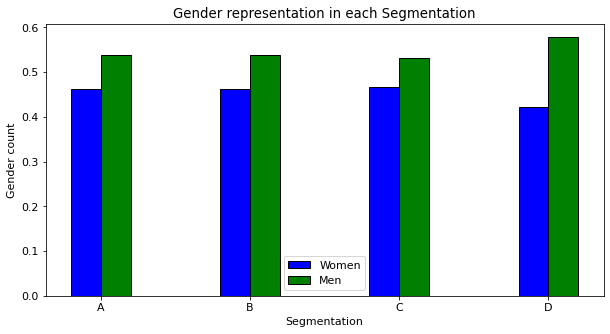

In [224]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 11})

n = 4
r = np.arange(n)
width = 0.2
plt.bar(r, df_dummy.groupby('Segmentation')['Gender'].value_counts(normalize = True)[:,0]
, color = 'b',
        width = width, edgecolor = 'black',
        label='Women')
plt.bar(r + width, df_dummy.groupby('Segmentation')['Gender'].value_counts(normalize = True)[:,1], color = 'g',
        width = width, edgecolor = 'black',
        label='Men')
  
plt.xlabel("Segmentation")
plt.ylabel("Gender count")
plt.title("Gender representation in each Segmentation")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['A','B','C','D'])
plt.legend()
  
plt.show()

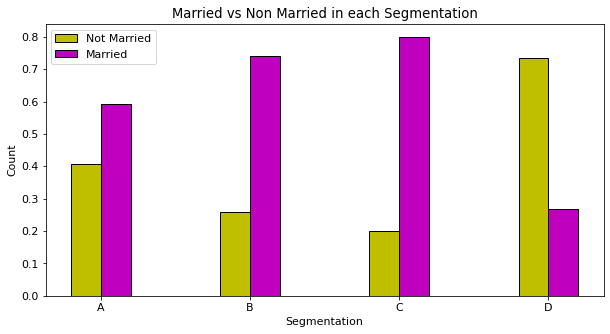

In [225]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 11})

n = 4
r = np.arange(n)
width = 0.2
plt.bar(r, df_dummy.groupby('Segmentation')['Ever_Married'].value_counts(normalize = True)[:,0]
, color = 'y',
        width = width, edgecolor = 'black',
        label='Not Married')
plt.bar(r + width, df_dummy.groupby('Segmentation')['Ever_Married'].value_counts(normalize = True)[:,1], color = 'm',
        width = width, edgecolor = 'black',
        label='Married')
  
plt.xlabel("Segmentation")
plt.ylabel("Count")
plt.title("Married vs Non Married in each Segmentation")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['A','B','C','D'])
plt.legend()
  
plt.show()

Text(0.5, 1.0, 'Mean Age of each Segmentation group')

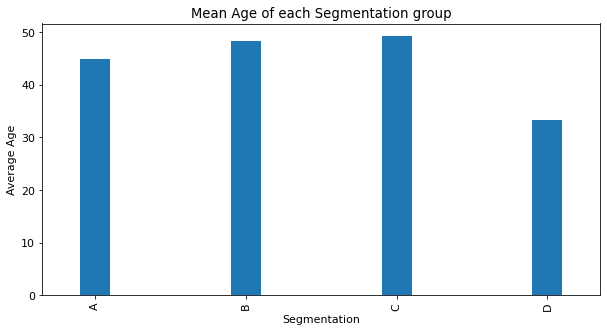

In [226]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 11})
df_dummy.groupby('Segmentation')['Age'].mean().plot(kind = 'bar', width = width)
plt.ylabel('Average Age')
plt.xlabel('Segmentation')
plt.title("Mean Age of each Segmentation group")

In [227]:
df_ab = pd.DataFrame(df_dummy.groupby('Segmentation')['Age_bins'].value_counts(normalize = True).sort_index())

In [228]:
df_ab = df_ab.stack().unstack(level = 1)

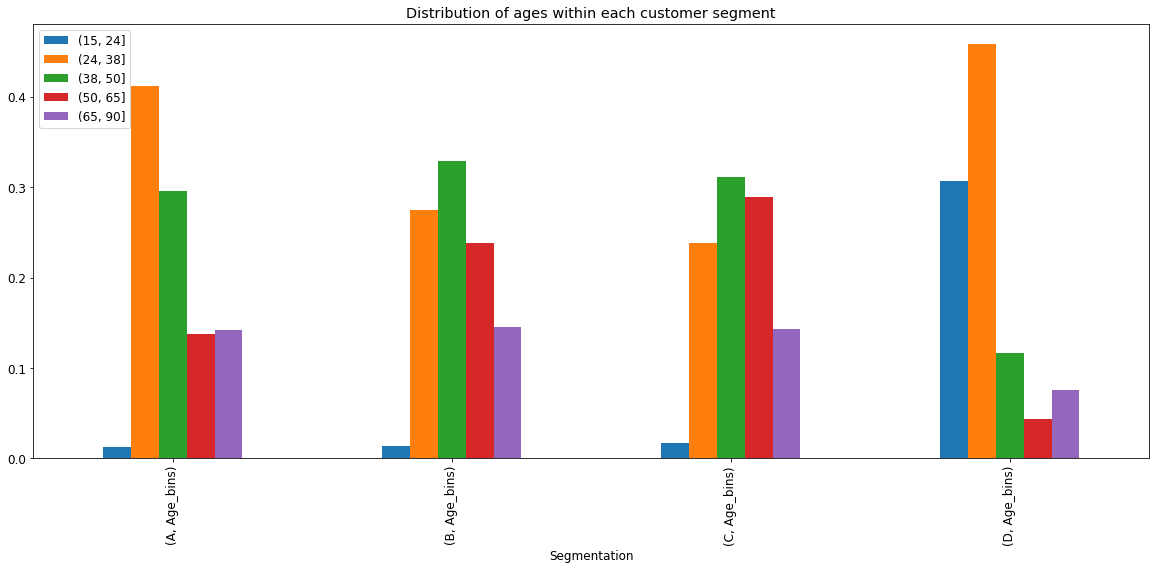

In [229]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 12})
df_ab.plot.bar()
plt.title('Distribution of ages within each customer segment')
plt.xlabel('Segmentation')
plt.legend(loc = 'upper left')

In [230]:
df_dummy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,"Age_bins_(15, 24]","Age_bins_(24, 38]","Age_bins_(38, 50]","Age_bins_(50, 65]","Age_bins_(65, 90]"
0,462809,1,0,22,0,Healthcare,1.000000,Low,4.0,Cat_4,...,0,1,0,0,0,1,0,0,0,0
1,462643,0,1,38,1,Engineer,2.874578,Average,3.0,Cat_4,...,0,0,0,0,0,0,1,0,0,0
2,466315,0,1,67,1,Engineer,1.000000,Low,1.0,Cat_6,...,0,0,0,0,0,0,0,0,0,1
3,461735,1,1,67,1,Lawyer,0.000000,High,2.0,Cat_6,...,0,0,0,1,0,0,0,0,0,1
4,462669,0,1,40,1,Entertainment,2.874578,High,6.0,Cat_6,...,0,0,0,0,0,0,0,1,0,0


In [231]:
df_dummy.groupby('Segmentation')['Graduated'].value_counts()


Segmentation  Graduated
A             1            1230
              0             723
B             1            1339
              0             506
C             1            1611
              0             338
D             0            1443
              1             802
Name: Graduated, dtype: int64

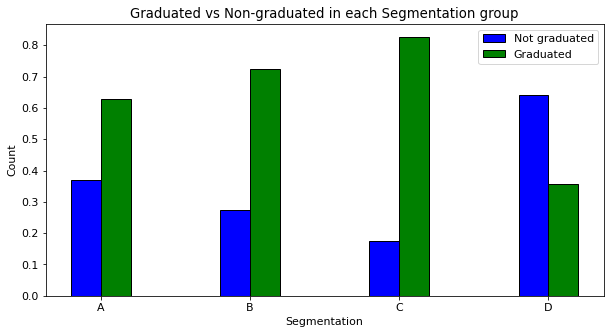

In [232]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 11})

n = 4
r = np.arange(n)
width = 0.2
plt.bar(r, df_dummy.groupby('Segmentation')['Graduated'].value_counts(normalize = True)[:,0]
, color = 'b',
        width = width, edgecolor = 'black',
        label='Not graduated')
plt.bar(r + width, df_dummy.groupby('Segmentation')['Graduated'].value_counts(normalize = True)[:,1], color = 'g',
        width = width, edgecolor = 'black',
        label='Graduated')
  
plt.xlabel("Segmentation")
plt.ylabel("Count")
plt.title("Graduated vs Non-graduated in each Segmentation group")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['A','B','C','D'])
plt.legend()
  
plt.show()

Text(0.5, 1.0, 'Average Work Experience for each Segmentation group')

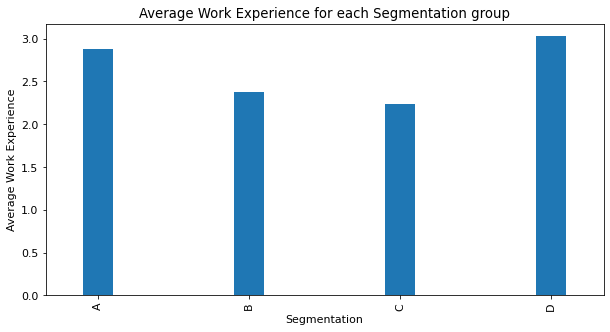

In [233]:
df_dummy.groupby('Segmentation')['Work_Experience'].mean().plot(kind = 'bar', width = width)
plt.xlabel('Segmentation')
plt.ylabel('Average Work Experience')
plt.title("Average Work Experience for each Segmentation group")

Text(0.5, 1.0, 'Average Family Size for each Segmentation group')

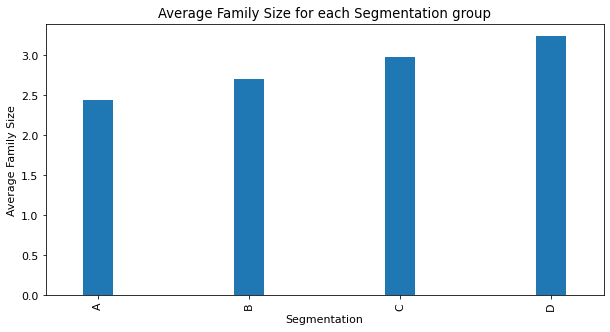

In [234]:
df_dummy.groupby('Segmentation')['Family_Size'].mean().plot(kind = 'bar', width = width)
plt.xlabel('Segmentation')
plt.ylabel('Average Family Size')
plt.title("Average Family Size for each Segmentation group")

In [235]:
df_seg = pd.DataFrame(df_dummy.groupby('Segmentation')['Spending_Score'].value_counts(normalize = True))

In [236]:
df_seg.sort_index(inplace = True)

In [237]:
segments

['A', 'B', 'C', 'D']

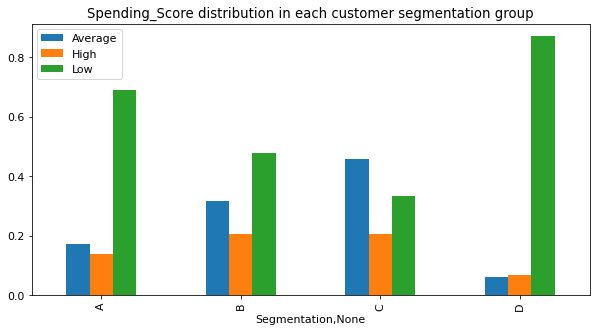

In [238]:
df_seg.stack().unstack(level = 1).plot.bar()
x = [0,1,2,3]
plt.xticks(x, segments, rotation = 'vertical')
plt.title('Spending_Score distribution in each customer segmentation group')
plt.legend(loc = 'upper left')

In [239]:
df_var = pd.DataFrame(df_dummy.groupby('Segmentation')['Var_1'].value_counts(normalize = True))

In [240]:
df_var = df_var.stack().unstack(level = 1)

Text(0.5, 0, 'Segmentation')

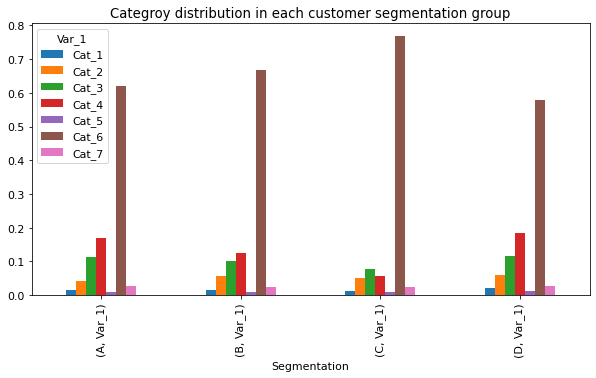

In [241]:
plt.rcParams.update({'font.size': 11})

df_var.plot.bar()
plt.title('Categroy distribution in each customer segmentation group')
plt.xlabel('Segmentation')

In [242]:
df_var

,Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,,
A,Var_1,0.015873,0.042499,0.114183,0.170507,0.009729,0.621096,0.026114
B,Var_1,0.014092,0.057453,0.100813,0.125745,0.010840,0.667751,0.023306
C,Var_1,0.013340,0.050795,0.079015,0.055926,0.009236,0.767573,0.024115
D,Var_1,0.022272,0.059688,0.115367,0.184855,0.012472,0.577728,0.027617


In [243]:
df_pro = pd.DataFrame(df.groupby('Segmentation')['Profession'].value_counts(normalize = True))
df_pro = df_pro.sort_index()


Text(0.5, 1.0, 'Distribution of Professions in each Customer segment')

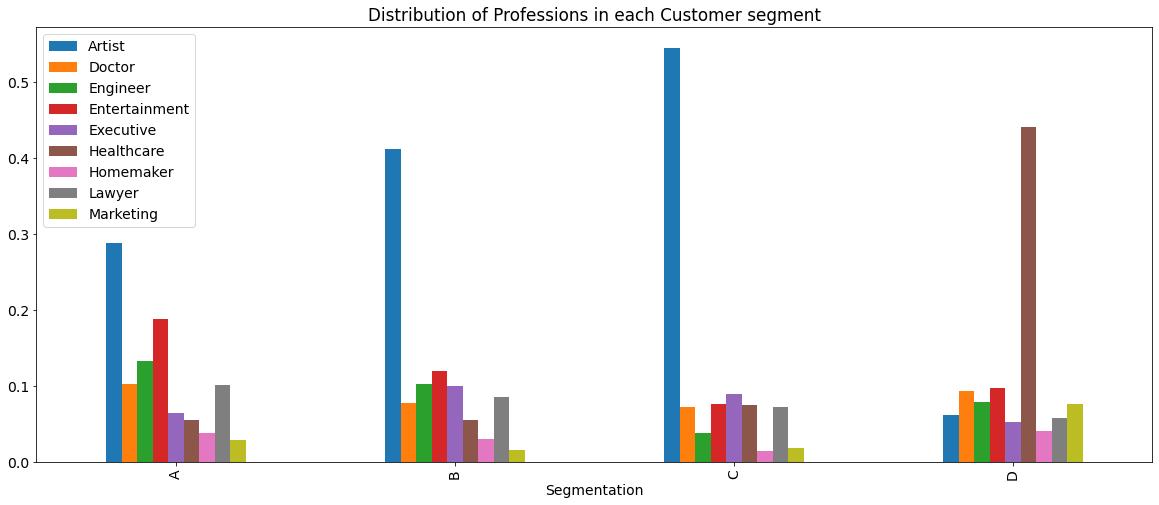

In [244]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 14})


x = [0,1,2,3]

df_pro.stack().unstack(level = 1).plot.bar()
plt.xticks(x, segments, rotation = 'vertical')
plt.xlabel('Segmentation')
plt.legend(loc = 'upper left')

plt.title('Distribution of Professions in each Customer segment')

In [245]:
df_dummy.isnull().sum()

ID                          0
Gender                      0
Ever_Married                0
Age                         0
Graduated                   0
Profession                  0
Work_Experience             0
Spending_Score              0
Family_Size                 0
Var_1                       0
Segmentation                0
Age_bins                    0
Var_1_Cat_1                 0
Var_1_Cat_2                 0
Var_1_Cat_3                 0
Var_1_Cat_4                 0
Var_1_Cat_5                 0
Var_1_Cat_6                 0
Var_1_Cat_7                 0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Age_bins_(15, 24]           0
Age_bins_(24, 38]           0
Age_bins_(

In [247]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils


encode = LabelEncoder()

In [248]:
df_dummy.isnull().sum()

ID                          0
Gender                      0
Ever_Married                0
Age                         0
Graduated                   0
Profession                  0
Work_Experience             0
Spending_Score              0
Family_Size                 0
Var_1                       0
Segmentation                0
Age_bins                    0
Var_1_Cat_1                 0
Var_1_Cat_2                 0
Var_1_Cat_3                 0
Var_1_Cat_4                 0
Var_1_Cat_5                 0
Var_1_Cat_6                 0
Var_1_Cat_7                 0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Age_bins_(15, 24]           0
Age_bins_(24, 38]           0
Age_bins_(

In [53]:
X = df_dummy.drop(columns = ['Age','Var_1','Spending_Score', 'Profession', 'Age_bins', 'ID', 
                             'Segmentation','Var_1_Cat_7', 
                             'Var_1_Cat_6', 'Var_1_Cat_5', 
                         'Var_1_Cat_2', 'Var_1_Cat_1']).to_numpy()
y = df_dummy['Segmentation'].to_numpy()
encode = LabelEncoder()
encode.fit(y)
encoded_Y = encode.transform(y)


In [54]:
encoded_Y

array([3, 0, 1, ..., 3, 1, 1])

In [55]:
df_dummy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,"Age_bins_(15, 24]","Age_bins_(24, 38]","Age_bins_(38, 50]","Age_bins_(50, 65]","Age_bins_(65, 90]"
0,462809,1,0,22,0,Healthcare,1.000000,Low,4.0,Cat_4,...,0,1,0,0,0,1,0,0,0,0
1,462643,0,1,38,1,Engineer,2.874578,Average,3.0,Cat_4,...,0,0,0,0,0,0,1,0,0,0
2,466315,0,1,67,1,Engineer,1.000000,Low,1.0,Cat_6,...,0,0,0,0,0,0,0,0,0,1
3,461735,1,1,67,1,Lawyer,0.000000,High,2.0,Cat_6,...,0,0,0,1,0,0,0,0,0,1
4,462669,0,1,40,1,Entertainment,2.874578,High,6.0,Cat_6,...,0,0,0,0,0,0,0,1,0,0


In [56]:
df_dummy.dtypes

ID                             int64
Gender                         int32
Ever_Married                   int32
Age                            int64
Graduated                      int32
Profession                    object
Work_Experience              float64
Spending_Score                object
Family_Size                  float64
Var_1                         object
Segmentation                  object
Age_bins                    category
Var_1_Cat_1                    uint8
Var_1_Cat_2                    uint8
Var_1_Cat_3                    uint8
Var_1_Cat_4                    uint8
Var_1_Cat_5                    uint8
Var_1_Cat_6                    uint8
Var_1_Cat_7                    uint8
Spending_Score_Average         uint8
Spending_Score_High            uint8
Spending_Score_Low             uint8
Profession_Artist              uint8
Profession_Doctor              uint8
Profession_Engineer            uint8
Profession_Entertainment       uint8
Profession_Executive           uint8
P

# Splitting the data into train and test

In [249]:
X_t, X_val, y_t, y_val = train_test_split(X, encoded_Y, test_size=0.2, random_state=42)

In [250]:
X_t.shape

(6393, 24)

In [251]:
scale = StandardScaler()
X_train = scale.fit_transform(X_t)
X_test = scale.fit_transform(X_val)

In [252]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC


In [253]:
D = X.shape[1]


In [254]:
X.shape

(7992, 24)

In [255]:
X_train

array([[-1.10969077,  0.84413484, -1.2864293 , ..., -0.58523769,
        -0.45837528, -0.37766036],
       [ 0.90115195,  0.84413484, -1.2864293 , ...,  1.70870746,
        -0.45837528, -0.37766036],
       [-1.10969077, -1.18464487,  0.77734548, ..., -0.58523769,
        -0.45837528, -0.37766036],
       ...,
       [ 0.90115195,  0.84413484,  0.77734548, ..., -0.58523769,
        -0.45837528, -0.37766036],
       [ 0.90115195,  0.84413484, -1.2864293 , ...,  1.70870746,
        -0.45837528, -0.37766036],
       [-1.10969077,  0.84413484,  0.77734548, ...,  1.70870746,
        -0.45837528, -0.37766036]])

In [256]:
accuracy = pd.DataFrame(columns  = ['Accuracy_mean', 'Precision', 'Recall', 'F1_score'], index = ['Logistic Regression', 
                                                          'SVM', 'Decision Tree', 'Xgboost', 
                                                          'Gradient Boosting Classifier', 
                                                          'Neural Network'])

In [ ]:
def fill_metrics(model, predictions):
    accuracy.loc[model, 'Accuracy_mean'] = accuracy_score(y_val, predictions)
    accuracy.loc[model, 'Precision'] = precision_score(y_val, predictions, average = 'weighted')
    accuracy.loc[model, 'Recall'] = recall_score(y_val, predictions, average = 'weighted')
    accuracy.loc[model, 'F1_score'] = f1_score(y_val, predictions, average = 'weighted')
    return accuracy

# Model Selection

In [259]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score

svc_model = OneVsOneClassifier(LinearSVC(random_state=0))
svc_model.fit(X_train, y_t)
pred_svc = svc_model.predict(X_test)
fill_metrics('SVM', pred_svc)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,NaN,NaN,NaN,NaN
SVM,0.51157,0.499169,0.51157,0.503065
Decision Tree,NaN,NaN,NaN,NaN
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN


In [261]:
lm = linear_model.LogisticRegression(multi_class='multinomial')
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
distributions = dict(C=uniform(loc=0, scale=4),
                    penalty=['l2', 'l1'], 
                     solver = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
rand_lm = RandomizedSearchCV(lm, distributions, random_state=0)
rand_lm.fit(X_train, y_t)

pred_rand_lm = rand_lm.predict(X_test)
rand_lm.score(X_test, y_val)
fill_metrics('Logistic Regression', pred_rand_lm)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.515322,0.504781,0.515322,0.507123
SVM,0.51157,0.499169,0.51157,0.503065
Decision Tree,NaN,NaN,NaN,NaN
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN


In [262]:
X_train.shape[1]

24

In [263]:
from keras.utils import to_categorical

dummy_y = to_categorical(encoded_Y)
dummy_y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [264]:
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X, dummy_y, test_size = 0.2, random_state = 42)

In [291]:
model = Sequential()
model.add(Dense(90, input_dim = (X_train.shape[1]), activation = 'relu'))
model.add(Dense(10, input_dim = (X_train.shape[1]), activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_nn_train, y_nn_train, epochs = 150, batch_size = 1000)
scores = model.evaluate(X_nn_test, y_nn_test)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

Epoch 1/150
7/7 [==============================] - 0s 2ms/step - loss: 1.4143 - accuracy: 0.2687
Epoch 2/150
7/7 [==============================] - 0s 2ms/step - loss: 1.3473 - accuracy: 0.3812
Epoch 3/150
7/7 [==============================] - 0s 2ms/step - loss: 1.3065 - accuracy: 0.4165
Epoch 4/150
7/7 [==============================] - 0s 1ms/step - loss: 1.2676 - accuracy: 0.4225
Epoch 5/150
7/7 [==============================] - 0s 2ms/step - loss: 1.2322 - accuracy: 0.4233
Epoch 6/150
7/7 [==============================] - 0s 1ms/step - loss: 1.2046 - accuracy: 0.4309
Epoch 7/150
7/7 [==============================] - 0s 1ms/step - loss: 1.1801 - accuracy: 0.4419
Epoch 8/150
7/7 [==============================] - 0s 2ms/step - loss: 1.1603 - accuracy: 0.4638
Epoch 9/150
7/7 [==============================] - 0s 1ms/step - loss: 1.1432 - accuracy: 0.4804
Epoch 10/150
7/7 [==============================] - 0s 2ms/step - loss: 1.1285 - accuracy: 0.5010
Epoch 11/150
7/7 [===========

In [281]:
from keras.utils import to_categorical

pred = model.predict(X_nn_test)
class_pred = np.zeros((pred.shape[0],))
class_true = np.zeros((y_nn_test.shape[0],))
for i in range(len(pred)):
    class_pred[i] = np.argmax(pred[i])
    
for i in range(len(y_nn_test)):
    class_true[i] = np.argmax(y_nn_test[i])


50/50 [==============================] - 0s 905us/step


In [282]:
fill_metrics('Neural Network', class_pred)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.515322,0.504781,0.515322,0.507123
SVM,0.51157,0.499169,0.51157,0.503065
Decision Tree,NaN,NaN,NaN,NaN
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,NaN,NaN,NaN,NaN
Neural Network,0.541588,0.535813,0.541588,0.53652


In [268]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
clf = GradientBoostingClassifier()
parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : sp_randInt(4, 10)
                 }
randm_gbclf = RandomizedSearchCV(estimator=clf, param_distributions = parameters,
                               cv = 10, n_iter = 10, n_jobs=-1)
randm_gbclf.fit(X_train, y_t)
randm_gbclf.best_estimator_
model_gb = GradientBoostingClassifier(learning_rate=0.31613038970599905, max_depth=4,
                           n_estimators=657, subsample=0.8062766936135211, random_state = 0)
model_gb.fit(X_train, y_t)


GradientBoostingClassifier(learning_rate=0.31613038970599905, max_depth=4,
                           n_estimators=657, random_state=0,
                           subsample=0.8062766936135211)

In [283]:
pred_gb = model_gb.predict(X_test)
fill_metrics('Gradient Boosting Classifier', pred_gb)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.515322,0.504781,0.515322,0.507123
SVM,0.51157,0.499169,0.51157,0.503065
Decision Tree,NaN,NaN,NaN,NaN
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,0.521576,0.517476,0.521576,0.518893
Neural Network,0.541588,0.535813,0.541588,0.53652


In [82]:
Y_pred_lm = lm.predict(X_test)

In [83]:
np.mean(Y_pred_lm == y_val)*100

51.5322076297686

In [84]:
from sklearn.metrics import classification_report
label_names = ['A', 'B', 'C', 'D']
print(classification_report(class_true, class_pred, target_names = label_names))

              precision    recall  f1-score   support

           A       0.44      0.40      0.42       403
           B       0.37      0.33      0.35       354
           C       0.63      0.58      0.60       416
           D       0.61      0.76      0.68       426

    accuracy                           0.53      1599
   macro avg       0.51      0.52      0.51      1599
weighted avg       0.52      0.53      0.52      1599



In [85]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(class_true, class_pred)

confusion_matrix

array([[163,  91,  48, 101],
       [ 98, 116,  89,  51],
       [ 39,  83, 241,  53],
       [ 73,  23,   7, 323]], dtype=int64)

In [86]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'B', 'C', 'D'])

In [87]:
y_val

array([1, 3, 1, ..., 0, 2, 3])

In [88]:
unique, counts = np.unique(y_val, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 403]
 [  1 354]
 [  2 416]
 [  3 426]]


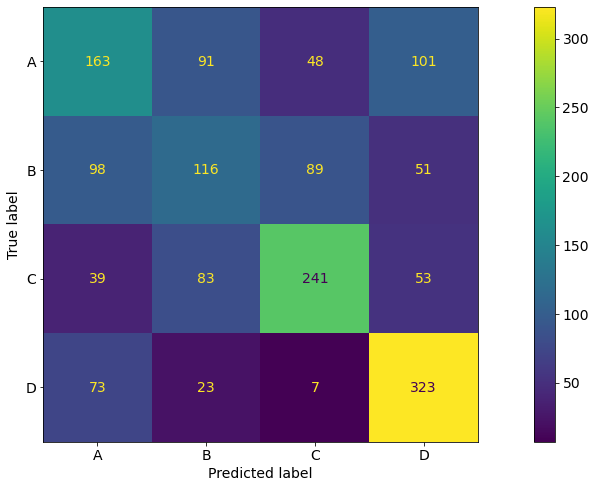

In [89]:
cm_display.plot()
plt.show()

In [90]:
import xgboost as xgb


In [91]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [92]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
dTree_clf = DecisionTreeClassifier()
param_dist = {"max_depth": range(3,10,2),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(dTree_clf, param_dist, cv=5)
tree_cv.fit(X_train,y_t)
pred_tree_cv = tree_cv.predict(X_test)

0.490931832395247

In [93]:
tree_cv = RandomizedSearchCV(dTree_clf, param_dist, cv=5)

In [94]:
tree_cv.fit(X_train,y_t)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 10, 2),
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001923414F370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001923414F490>})

In [95]:
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 8}

In [196]:
y_pred_tree_cv = tree_cv.predict(X_test)


In [284]:
fill_metrics('Decision Tree', y_pred_tree_cv)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.515322,0.504781,0.515322,0.507123
SVM,0.51157,0.499169,0.51157,0.503065
Decision Tree,0.524078,0.535061,0.524078,0.526976
Xgboost,NaN,NaN,NaN,NaN
Gradient Boosting Classifier,0.521576,0.517476,0.521576,0.518893
Neural Network,0.541588,0.535813,0.541588,0.53652


In [99]:
from sklearn.metrics import accuracy_score

In [101]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_model=RandomizedSearchCV(xgb_classifier,
                            param_distributions=params,
                            n_iter=5,scoring='accuracy',
                            n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train,y_t)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [198]:
predictions_xg = rs_model.predict(X_test)
rs_model.score(X_test, y_val)

0.5816135084427767

In [285]:
fill_metrics('Xgboost', predictions_xg)

,Accuracy_mean,Precision,Recall,F1_score
Logistic Regression,0.515322,0.504781,0.515322,0.507123
SVM,0.51157,0.499169,0.51157,0.503065
Decision Tree,0.524078,0.535061,0.524078,0.526976
Xgboost,0.581614,0.575091,0.581614,0.576703
Gradient Boosting Classifier,0.521576,0.517476,0.521576,0.518893
Neural Network,0.541588,0.535813,0.541588,0.53652


# Model Evaluation

In [109]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_val, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['A', 'B', 'C', 'D'])

cm_display.plot()
plt.show()

array([[201,  68,  52,  82],
       [ 76, 146,  87,  45],
       [ 30,  78, 260,  48],
       [ 73,  20,  10, 323]], dtype=int64)

In [110]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'B', 'C', 'D'])

In [111]:
y_val

array([1, 3, 1, ..., 0, 2, 3])

In [112]:
unique, counts = np.unique(y_val, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 403]
 [  1 354]
 [  2 416]
 [  3 426]]


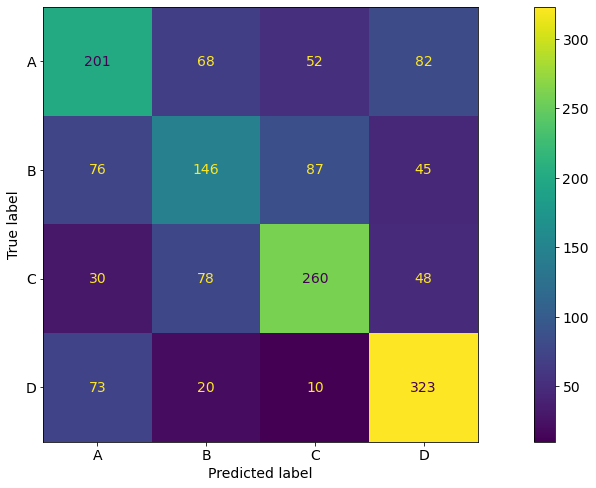

In [115]:
cm_display.plot()
plt.show()

In [114]:
from sklearn.metrics import classification_report
label_names = ['A', 'B', 'C', 'D']
print(classification_report(y_val, predictions, target_names = label_names))

              precision    recall  f1-score   support

           A       0.53      0.50      0.51       403
           B       0.47      0.41      0.44       354
           C       0.64      0.62      0.63       416
           D       0.65      0.76      0.70       426

    accuracy                           0.58      1599
   macro avg       0.57      0.57      0.57      1599
weighted avg       0.58      0.58      0.58      1599

